## Loading The Libraries

In [9]:
library(OmicCircos)
options(stringsAsFactors = FALSE)

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, w

## Segment Data

Segment data will be plotted to the outer most circle. It basically contains name of chromosome and within which porsion a gene or our region of interest lies. Let's read and have a look: 

In [5]:
seg_data = read.csv("segment.csv", header = TRUE)

head(seg_data)

chr,start,end,gene,desc
chr1,0,10,gene1,desc1
chr1,10,20,gene2,desc2
chr1,20,50,gene3,desc3
chr2,0,5,gene4,desc4
chr2,5,15,gene5,desc5
chr2,15,25,gene6,desc6


As we can see here are 5 columns, in the first row we said **gene1** resides within 0 to 10 of **chr1**, here chr stands for chromosome. In the second row we are saing that gene2 resides within 10 to 20 of chr1. 

1. Names of the columns can be anything. Just their content matters.
2. Though the functions use just first 3 columns but if we don't provide in total 5 columns, some errors occurs.

## Mapping Data

This data must contain at least 4 columns. First 3 are chromosome, position and description, in our case gene and all the columns after them are values. These values can be result of any experiment or any matrix which we want to plot in within the circle. May be these can be expression level of genes, gc contains of gene anything. Let's see what our data looks like:

In [3]:
mapping_data = read.csv("mapping.csv", header = TRUE)
head(mapping_data)

chr,po,gene,value
chr1,0,gene1,10
chr1,10,gene2,7
chr1,20,gene3,12
chr2,0,gene4,20
chr2,5,gene5,5
chr2,15,gene6,10


In our data first row says first chromosome's gene1 has some arbitrary value 10. gene2 has 7 etc.

This values can be plotted with line, box or histogram in the plot. 


## Link Data

In our mapping data we can see that gene1 and gene6 has same arbitrary value 10. So, if we think of these ase expression values, then we may conclude that these two genes are co-expressing. That is they might have a link which we can plot with a line. These type of links we give our plot with link data. It looks like these:


In [4]:
link_data = read.csv("link.csv", header = TRUE) 

head(link_data)

chr1,po1,gene1,chr2,po2,gene2
1,0,gene1,2,15,gene6
3,0,gene7,1,10,gene2


In the first row we specified a link between gene1 of chr1 and gene6 of chr2. And the line indicating the link will be drawn from gene1's start to gene2's start position. These positions are also customizable. From segment data we can see that gene1 is from 0 to 10, and gene6 from 15 to 25, so we could also specify the link from 5 of gene1's to 20 of gene6. This would draw the line from the middle of the genes. 


## Link Polygon Data

These data are responsible for producing beautiful plogons within the circle. Where as links are drawn as lines, link polygons are drawn as something more aesthatic. In link data we just specified the position of links, and with link poly data we have to specify start and end of link, just like this: 

In [7]:
link_poly = read.csv("link_poly.csv", header = TRUE)

head(link_poly)

chr1,start,end,chr2,start.1,end.1
1,0,10,2,15,25
3,0,15,1,10,20


Here we said in the first row that the link between chr1 and chr2 lays between 0 to 10 of chr1 and 15 to 25 of chr2. That is full gene1 and gene6 will be drawn as link poly. 

## Converting linear data to angular data

We create or provide the baseline of our plot as segment data. It is a linear data, we don't specify where and how we should bend to create a beautiful circle. Omicircos provide us a function **segAnglePo**, we give it our segment and it will create a dataframe with angular information of our segment. 

Point to be noted that in real case our segment data might contain thousands of chromosomes but we may want to plot only few hundreds, we can also pass a vector or chromosome in the seg paramenter:

In [10]:
# We want all chromosome to be plotted so we create a vector containing all the name of the choromosomes:
seg_name <- paste("chr", 1:3, sep="")

# We create the angular data
db       <- segAnglePo(seg_data, seg=seg_name)

# and make some color too!
colors   <- rainbow(7, alpha=0.5)

head(db)

seg.name,angle.start,angle.end,seg.sum.start,seg.sum.end,seg.start,seg.end
chr1,270,423.913043478261,0,50,0,50
chr2,425.913043478261,502.869565217391,50,75,0,25
chr3,504.869565217391,628,75,115,0,40


I couldn't yet understand these data yet.

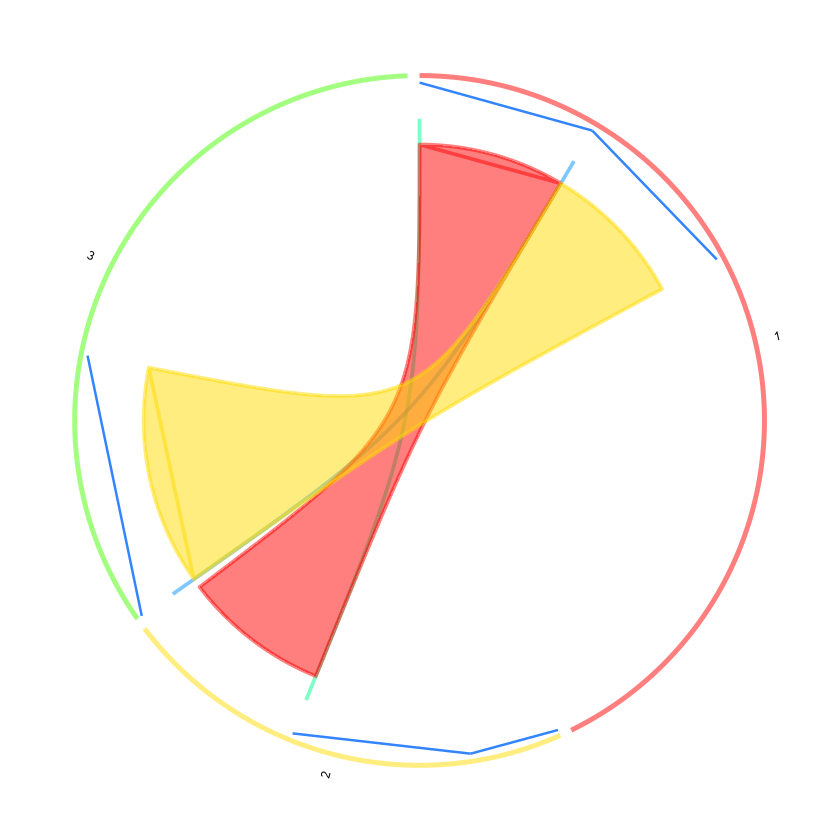

In [12]:
## Just initiation of plot, Need to study a bit to understand all the parameters and their effect
par(mar=c(2, 2, 2, 2))
plot(c(1,800), c(1,800), type="n", axes=FALSE, xlab="", ylab="", main="")

## Outermost cirlce representing the segment data
circos(R=400, cir=db, type="chr",  col=colors, print.chr.lab=TRUE, W=30, scale=FALSE, lwd = 10)

## A line graph denoting the values of column4 of mapping data as specified with col.v parameter
circos(R=390, cir=db, type="l",col.v = 4,mapping = mapping_data,B=TRUE, W=5, scale=FALSE, lwd=2)

## Links can be seen as green and blueish lines
circos(R=350, cir=db, W=20, mapping=link_data, type="link", lwd=3, col=colors[c(4:5)]);

## Polygons can be sen as redies and yellowish semi transparent regions
circos(R=320, cir=db, W=20, mapping=link_poly, type="link.pg", lwd=3 , col=colors, scale=FALSE)
